# House Price Prediction


A home prediction model—also referred to as a housing price prediction model or a real estate prediction model—is a statistical or machine learning model that attempts to estimate the worth or price of a property based on various traits and parameters. These models employ past data to forecast the expected price of a new or unsold home, such as the features of previously sold homes and their associated values.
A home prediction model is significant because it may help various real estate sector stakeholders by offering insightful information and support.
Home buyers may use house prediction models to determine if a listed property is priced relatively in light of its attributes and the current housing market. It guarantees customers are paying a fair price for a home and assists them in making educated selections.
Real estate brokers and home sellers may utilize house prediction models to help them choose the right listing price for a home. The model aids in optimizing pricing tactics to draw in prospective customers and increase profit by considering numerous elements, including location, size, facilities, and market trends.
Investors: Real estate investors depend on accurate property assessment to assess investment prospects. House prediction models provide them with information about prospective returns, dangers, and the viability of investments, assisting in managing their portfolios.
Financial Institutions: Before accepting mortgage applications, lenders and mortgage providers evaluate a home's worth using house prediction models. These models provide property values with a more data-driven, objective approach, lowering the possibility of overvaluing or undervaluing properties.
Urban planners and market analysts may better comprehend trends and patterns in the real estate industry thanks to housing price prediction models. Making wise policy choices, finding locations with strong growth potential, and planning urban development are all made easier with these insights.
A home prediction model provides accurate estimates of house values, making it a valuable tool in the real estate sector. It increases openness, allows stakeholders to make data-driven choices, and makes the housing market more effective and knowledgeable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


## Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split
X= data.drop(['median_house_value'], axis=1)
y=data['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [9]:
train_data= X_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18457,-121.80,37.23,18,3179,526.0,1663,507,5.9225,<1H OCEAN,265800
19848,-119.18,36.40,39,1730,310.0,899,309,2.6648,INLAND,129200
748,-122.09,37.66,39,1160,259.0,725,274,2.2222,NEAR BAY,158300
2456,-119.67,36.57,32,1604,292.0,868,276,2.1908,INLAND,110000
7415,-118.22,33.94,42,1046,287.0,1218,289,2.6538,<1H OCEAN,143400
...,...,...,...,...,...,...,...,...,...,...
19661,-120.84,37.50,47,2310,484.0,1126,447,2.2083,INLAND,97300
15176,-117.08,33.03,10,2296,450.0,818,405,4.3424,<1H OCEAN,160600
4915,-118.27,34.00,48,1869,461.0,1834,441,1.7052,<1H OCEAN,107400
13898,-116.62,34.23,14,6438,1719.0,1586,691,1.6136,INLAND,67400


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

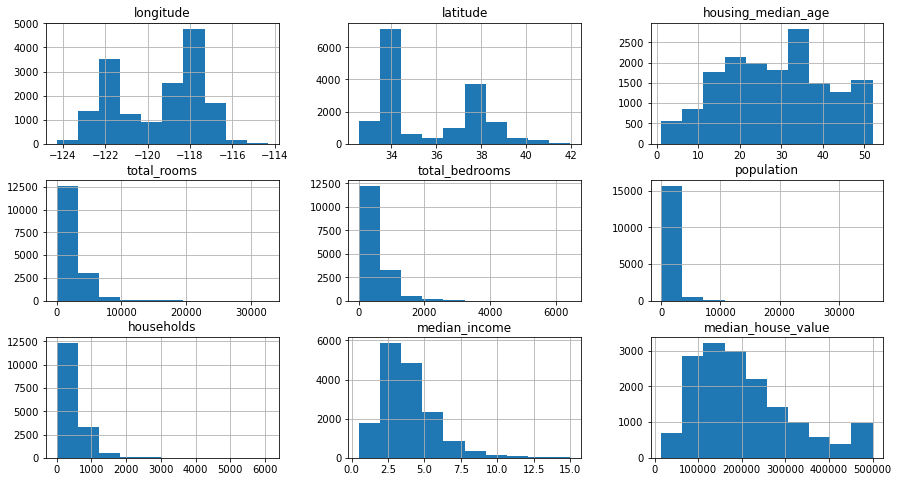

In [11]:
train_data.hist(figsize=(15,8))

In [12]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923492,-0.108883,0.048500,0.072442,0.101147,0.058863,-0.015779,-0.047437
latitude,-0.923492,1.000000,0.012143,-0.040226,-0.070131,-0.111036,-0.074938,-0.080706,-0.143432
housing_median_age,-0.108883,0.012143,1.000000,-0.361886,-0.318142,-0.294810,-0.300607,-0.119224,0.104403
total_rooms,0.048500,-0.040226,-0.361886,1.000000,0.927715,0.851131,0.915373,0.198025,0.136578
total_bedrooms,0.072442,-0.070131,-0.318142,0.927715,1.000000,0.872787,0.978562,-0.012564,0.049900
population,0.101147,-0.111036,-0.294810,0.851131,0.872787,1.000000,0.904155,0.002054,-0.025004
households,0.058863,-0.074938,-0.300607,0.915373,0.978562,0.904155,1.000000,0.008453,0.065467
median_income,-0.015779,-0.080706,-0.119224,0.198025,-0.012564,0.002054,0.008453,1.000000,0.688328
median_house_value,-0.047437,-0.143432,0.104403,0.136578,0.049900,-0.025004,0.065467,0.688328,1.000000


Each Field has a correlation of 1.00 meaning it has exact variables

<AxesSubplot:>

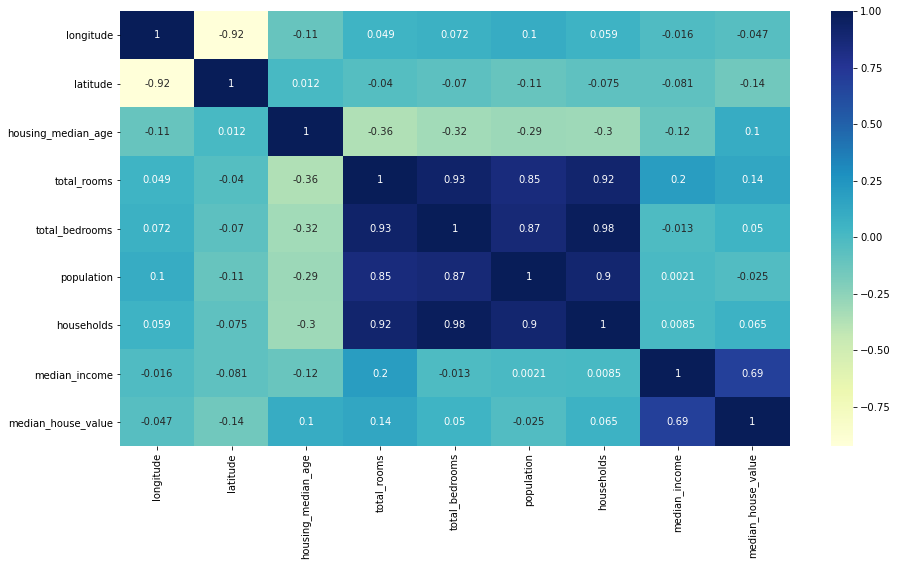

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

Median_income correlates highly (0.69) with the median house value

In [14]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

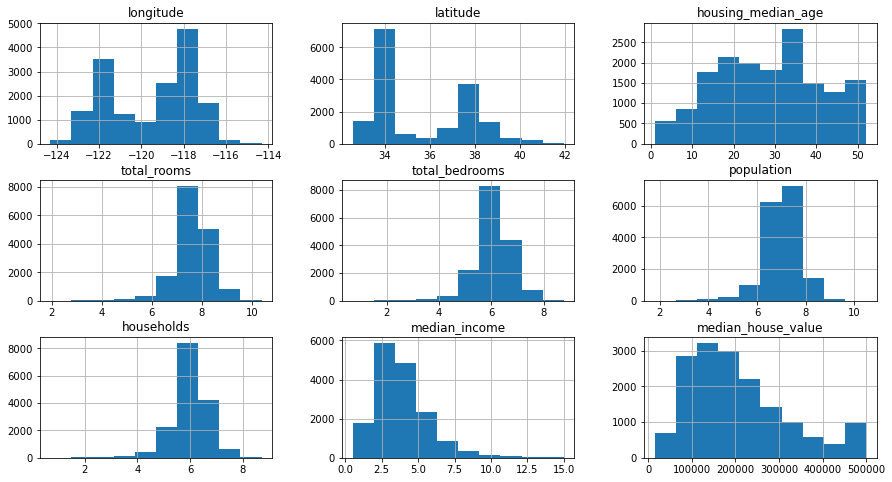

In [15]:
train_data.hist(figsize=(15,8))

In [16]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7264
INLAND        5174
NEAR OCEAN    2109
NEAR BAY      1795
ISLAND           4
Name: ocean_proximity, dtype: int64

In [17]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<AxesSubplot:>

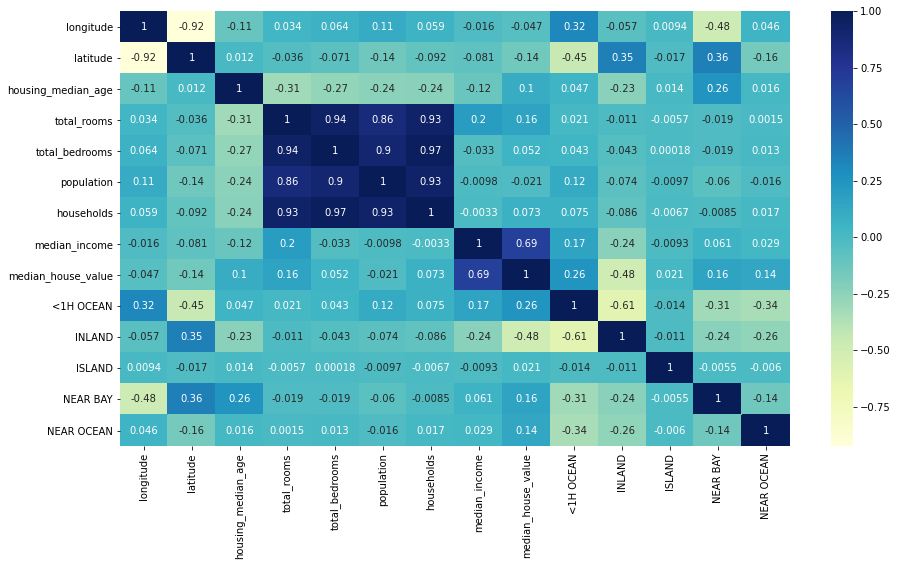

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

One pays less for median house value in inland

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

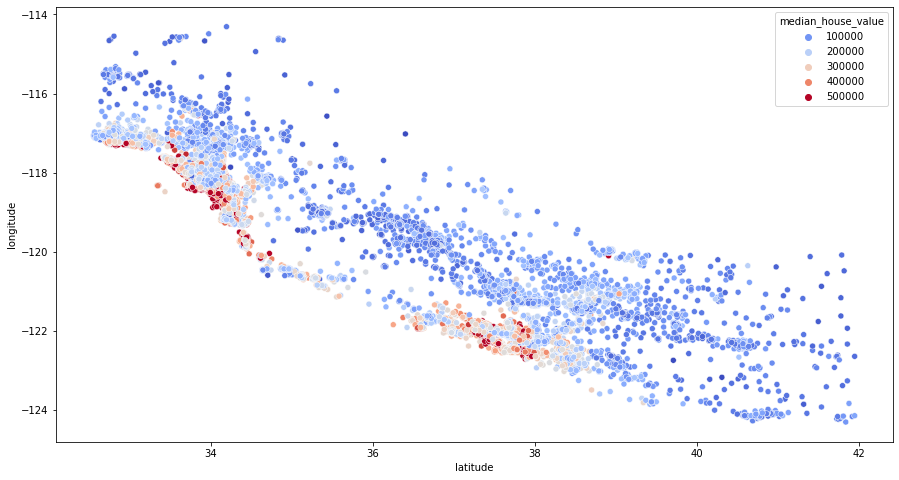

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

The more blue the scatter is, the less the house is expensive, and the more red the scatter is, the more the house is expensive.
From the chart, the houses near the coast are more expensive than those inland.

In [20]:
train_data['bedroom_ratio']=train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

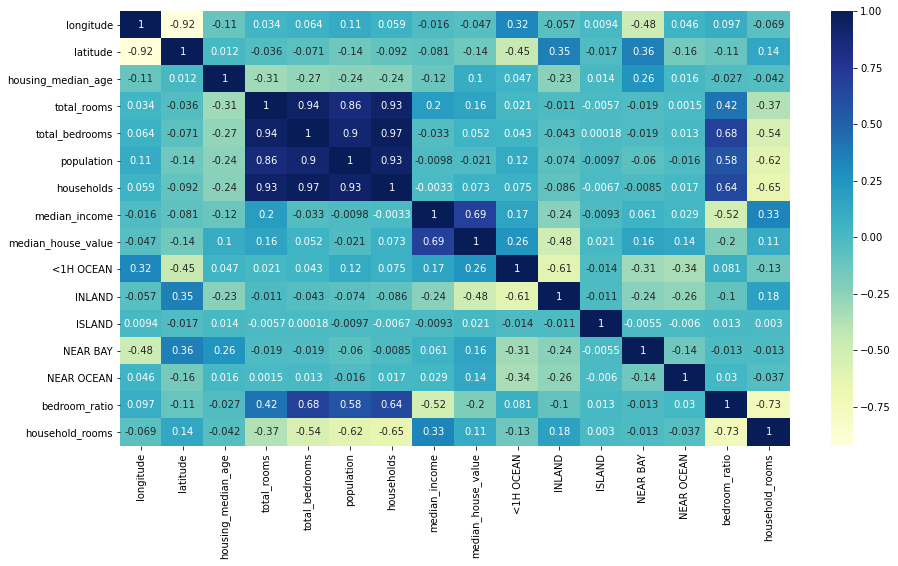

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

bedroom_ratio has a negative correlation median_house_value

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train, y_train= train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s=scaler.fit_transform(X_train)

reg=LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [23]:
test_data= X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms'] / test_data['households']


In [24]:
X_test, y_test= test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [25]:
X_test_s=scaler.transform(X_test)

In [26]:
reg.score(X_test_s, y_test)

0.6766294901561261

Based on the regression and random forest models used for house price prediction, the obtained regression score of 0.6766. The regression score of 0.6766 suggests that the regression model explains approximately 67.66% of the variance in the house price data. This indicates a moderate predictive capability, implying that the model captures some underlying patterns and factors influencing house prices.

In [27]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [28]:
forest.score(X_test, y_test)

-2.8191561856744376

The efficacy of the random forest model is questioned by the random forest regression score of -2.8192. A negative score is surprising and indicates that there may be severe overfitting or problems with the model's training. To increase the effectiveness and dependability of the model, it is crucial to look into and resolve these challenges.

## Summary

The project's environment, the precise objectives, and the intended use of the home price prediction model are just a few of the variables that affect how beneficial the model is for reaching conclusions. Considerations for using the model to get the findings are as follows: Regression's predictive performance is shown by a score of 0.6766, which means that the regression model accounts for around 67.66% of the variation in home prices. Although this points to a reasonable amount of predictive skill, evaluating the model's effectiveness in light of industry benchmarks and standards is crucial. To establish the model's relative usefulness, compare it to existing models or try an alternate strategy. Comparative Analysis: It is helpful to assess the model's performance compared to other models or methodologies before reaching conclusions. To ascertain if the acquired performance is better, comparable, or poorer, compare the findings with other regression models or ensemble approaches. This comparative study sheds light on how beneficial the particular model you created is in comparison. Consider the precise context in which the model will be employed when determining its contextual relevance. The results should only apply to that particular environment if the model were created for a specific geographic location, housing market, or time period. To guarantee that the results are reliable and practical, it is crucial to comprehend the model's applicability and constraints in various circumstances. Analyze the model's potential to assist decisions or contribute to specific applications. The model's findings, for instance, may help real estate brokers, purchasers, or investors make informed price selections, investment choices, or negotiating options. Its usefulness is increased by evaluating the model's possible influence on decision-making procedures. Continuous Improvement: Recognize that the model's applicability is dynamic. The model should be improved and refined continuously depending on input, new information, and validation. To increase the model's use and preserve its accuracy, keep an eye on how it performs over time and think about upgrading it sometimes.
In conclusion, the predictive performance, comparison analysis with other models, contextual relevance, the potential for decision assistance, and dedication to continual development affect how effective a model is for reaching conclusions. Evaluating these elements will give a better grasp of the model's utility and real-world applications for making sound judgments.
